## IT3385 Assignment - Task 1 & 2

**Goal:** 
- Perform EDA on Wheat Seeds Dataset to analyse and discover trends or patterns.
- Train, validate and develop a Machine Learning (ML) model to determine the type
of wheat based on attributes of its kernel given in the dataset.

**Name:** Toh Hong Sin

**Admin No:** 210951W

### Task 1

### Import Necessary Libraries and Load Dataset

In [1]:
# Import necessary libraries to read CSV file and create visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df_wheat = pd.read_csv('Datasets/Datasets/03_Wheat_Seeds.csv')

### Exploratory Data Analysis (EDA)

In [3]:
# Display first and last few rows of the dataframe
df_wheat

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Based on the results above, we can see that there are 199 rows and 8 columns in our dataset.

In [4]:
# Get dataset information
df_wheat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            199 non-null    float64
 1   Perimeter       199 non-null    float64
 2   Compactness     199 non-null    float64
 3   Length          199 non-null    float64
 4   Width           199 non-null    float64
 5   AsymmetryCoeff  199 non-null    float64
 6   Groove          199 non-null    float64
 7   Type            199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


Here, we look at the dataset information to see what kind of data we are dealing with. From the results, we can see that there are 7 float64 data type columns and 1 int64 data type column.

In [5]:
# Get statistical summary
df_wheat.describe()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


Looking at the statistical summary, we can see that both Area and Perimeter columns have similar mean values of 14. Generally, we can see that the dataset does not have an extremely wide spread of ranges. We can see that based on the minimum and maximum of each column. For example, in the Length column, the minimum value is around 4.89 and the maximum value is around 6.67. With such a small difference between the minimum and maximum values for each column, I feel that there is no need for us to do any binning later on when we train our model.

In [6]:
# Check for missing values in all columns
df_wheat.isnull().any()

Area              False
Perimeter         False
Compactness       False
Length            False
Width             False
AsymmetryCoeff    False
Groove            False
Type              False
dtype: bool

After looking at the statistical summary of the dataset, we checked if there were any missing values in each column. As seen above, there are none.

In [7]:
# Check for duplicated values
df_wheat.duplicated().sum()

0

Checking for duplicated values has also shown that the dataset does not contain any.

In [8]:
# Convert "Type" column to categorical for better visualisation
df_wheat['Wheat_Type'] = df_wheat['Type'].astype('category')
df_wheat['Wheat_Type'] = df_wheat['Wheat_Type'].map({1: 'Kama', 2: 'Rosa', 3: 'Canadian'})

In [9]:
# Check dataframe again
df_wheat

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type,Wheat_Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama
...,...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian


Here, we created a new column known as Wheat_Type to convert the Type column to categorical so that it is easier for us to interpret the data when we create visualisations to look for patterns and trends.

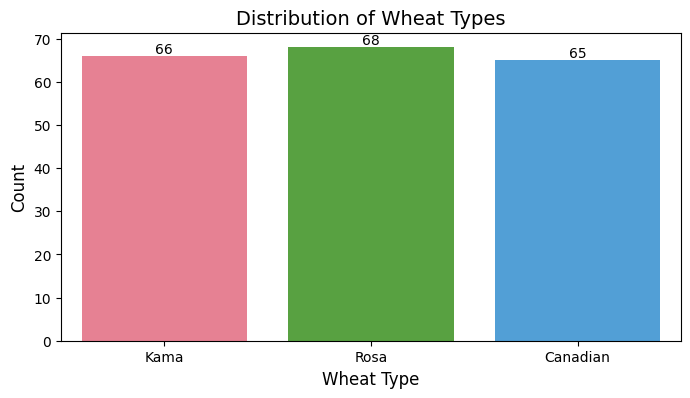

In [10]:
# Create countplot to show distribution of wheat types
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df_wheat, x='Wheat_Type', palette='husl') 

# Annotate each bar with count above
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)
    
# Display countplot
plt.title('Distribution of Wheat Types', fontsize=14)
plt.xlabel('Wheat Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Looking at the distribution of wheat types, we can see that the dataset is very well balanced. Each wheat type do not differ much in terms of number compared to one another. Hence, we would not need to use fix_imbalance later on when we preprocess our data. 

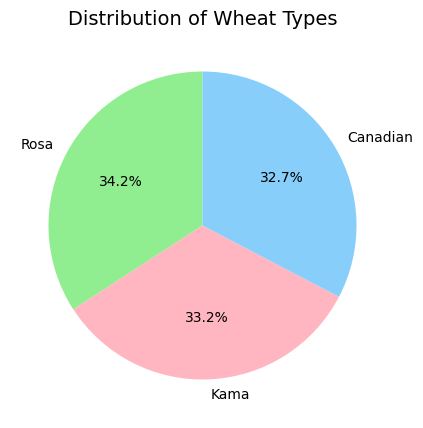

In [11]:
# Count each wheat type
wheat_counts = df_wheat['Wheat_Type'].value_counts()

# Define colors for the pie chart
colors = ['lightgreen','lightpink','lightskyblue']

# Create pie chart to show distribution of wheat types
plt.figure(figsize=(8, 5))
plt.pie(wheat_counts, labels=wheat_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Wheat Types', fontsize=14)
plt.show()

Similar to the histogram that we created above, we can also view the distribution of wheat types using a pie chart. From here, we can also see that the dataset is very well balanced.

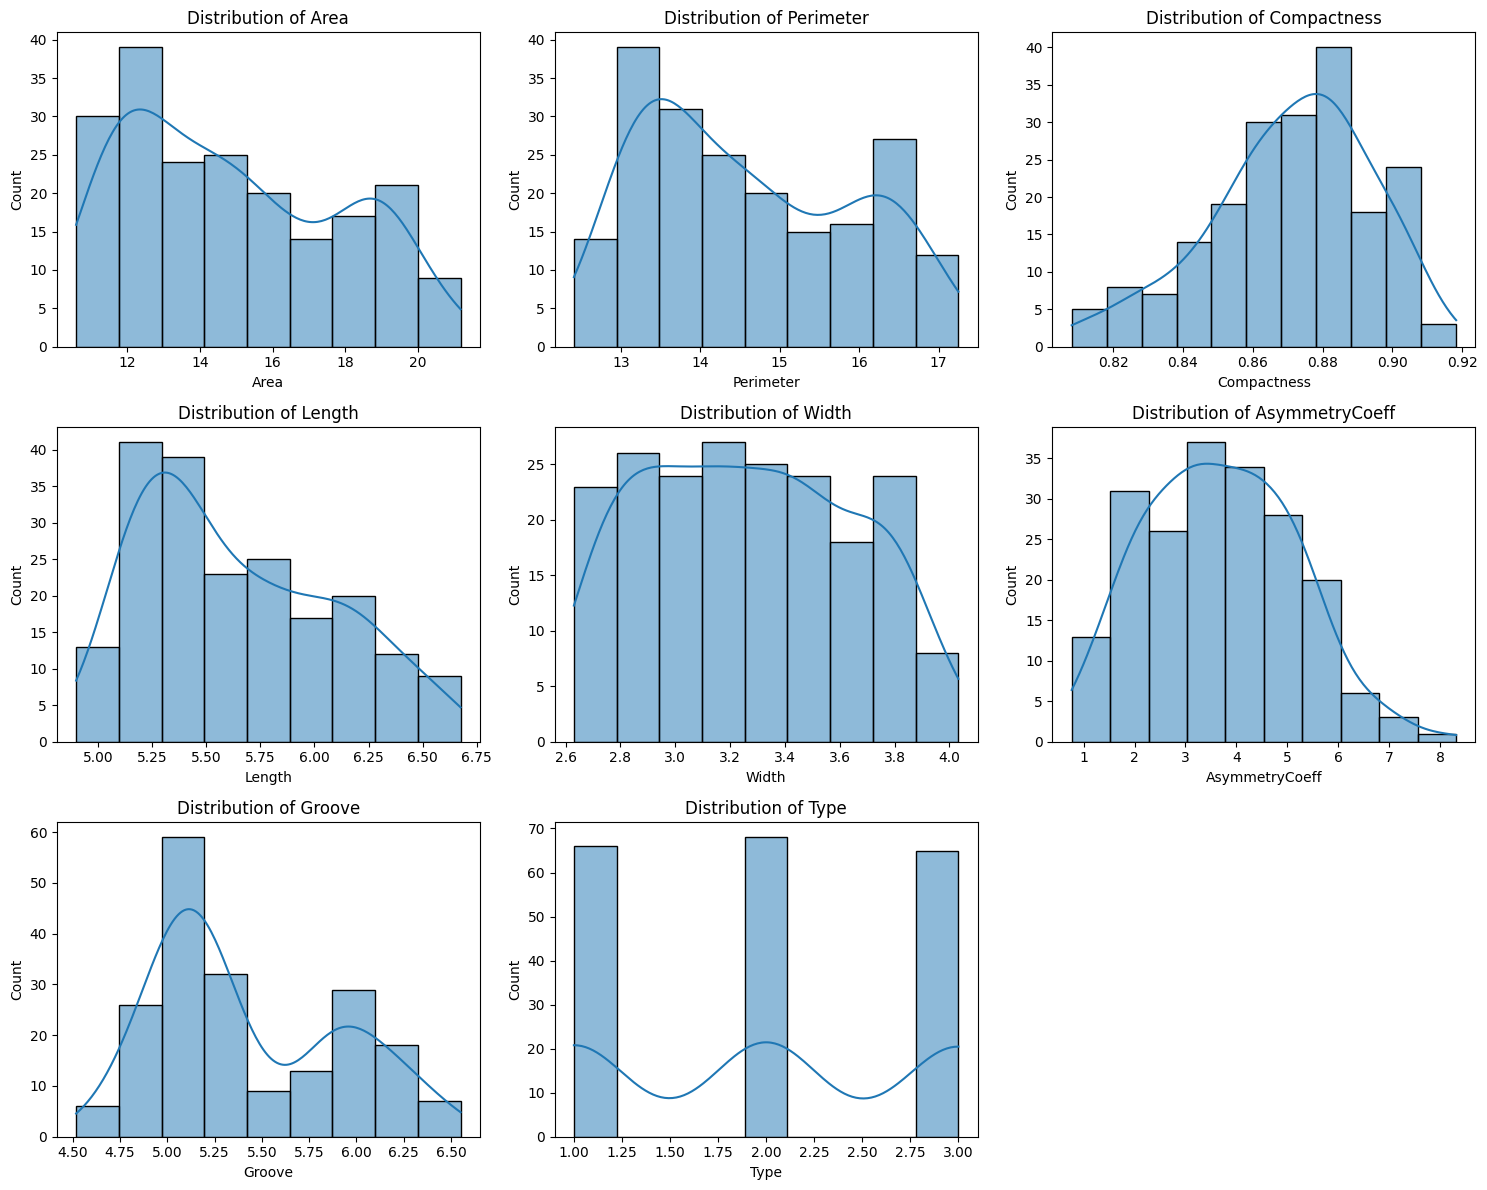

In [12]:
# Create visualisation to show distribution of numeric features
plt.figure(figsize=(15, 12))
for i, column in enumerate(df_wheat.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_wheat[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

After looking at the distribution of wheat types, we would need to look at the distribution of our numeric features. Based on the visualisations above, we can see that some columns are right skewed. For example, it is evident that some columns such as Area, Perimeter and Length are right skewed. However, there are also columns that are quite uniformly distributed and also left skewed. For instance, we can see that the Width column is quite uniformly distributed while the Compactness column is left skewed. To resolve this issue, we can try to normalize our data later on during preprocess.

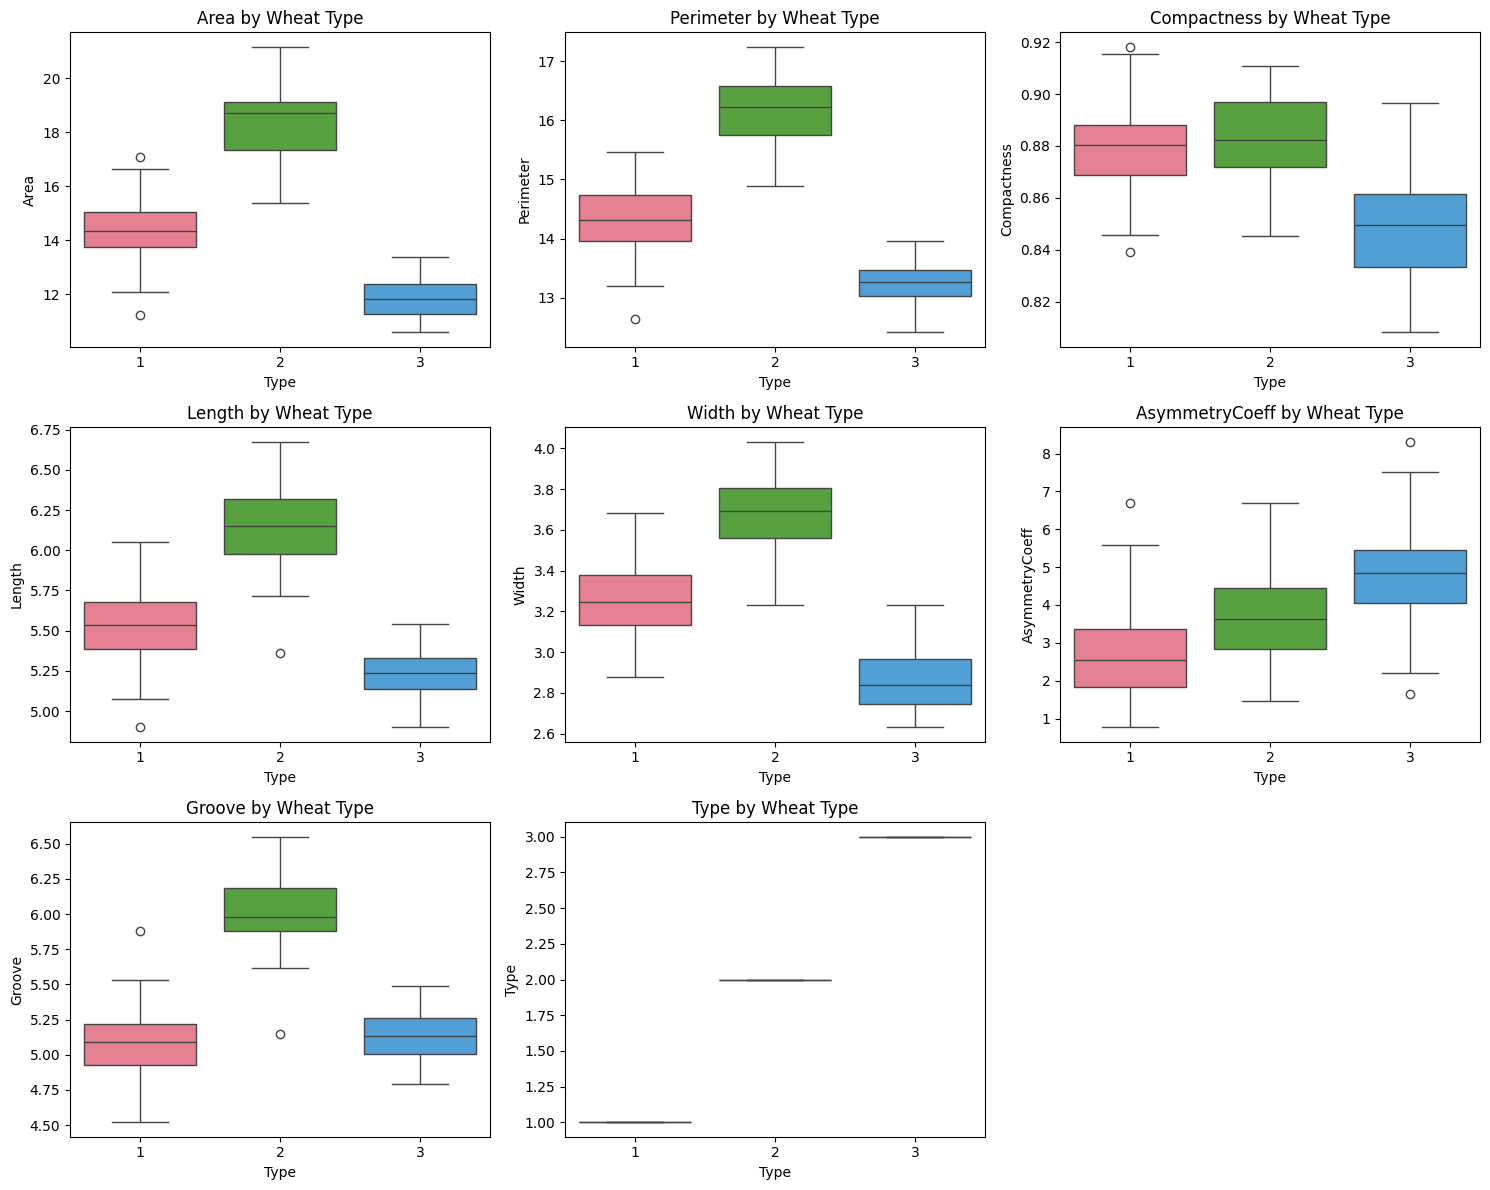

In [13]:
# Create box plots to check for outliers
plt.figure(figsize=(15, 12))
for i, column in enumerate(df_wheat.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df_wheat, x='Type', y=column, palette='husl')
    plt.title(f'{column} by Wheat Type')
plt.tight_layout()
plt.show()

Here, we created box plots for our numeric features based on the wheat types to check for outliers. From the results above, we can see that there are outliers present in many columns. For example, we can see that there are outliers present in the Area, Perimeter, Compactness, Length, AsymmetryCoeff and Groove columns. The only column without any outliers belonged to the Width column which was to be expected since we saw that it was quite uniformly distributed. Hence, we can use remove_outliers to deal with this.

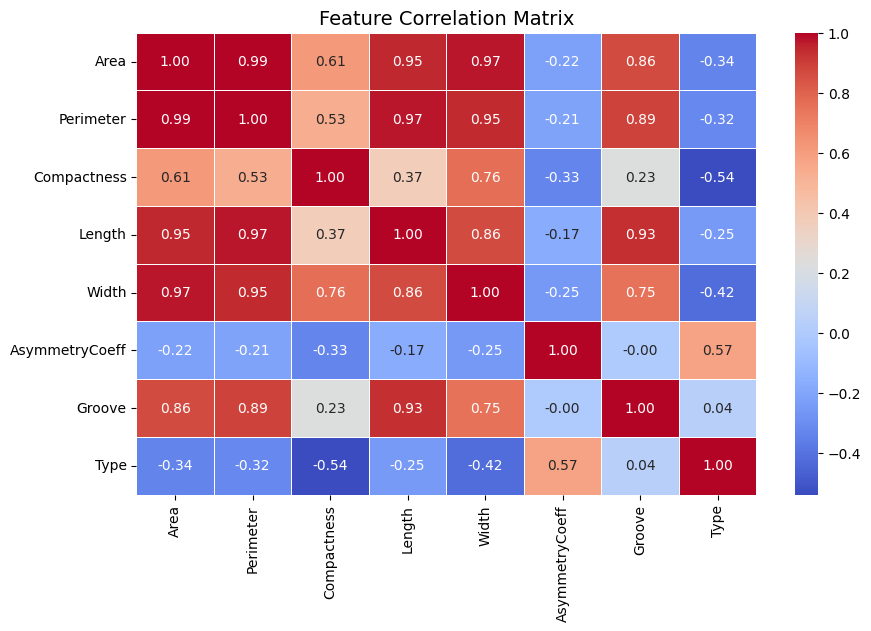

In [14]:
# Drop Wheat_Type as it is no longer needed
df_wheat.drop('Wheat_Type', axis=1, inplace=True)

# Compute correlation matrix
corr_matrix = df_wheat.corr()

# Create heatmap to show correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

At this stage, the Wheat_Type column that was created previously was dropped as it is no longer needed. Now, we created a correlation matrix to look at the relationship between our features. Based on the results above, we can see that the Area column has very strong correlation with quite a few other columns such as Perimeter (0.99), Length (0.95), and Width (0.97). We can also see that there are negative correlations for some of our features. For example, we can see that there is a negative correlation (-0.54) between Compactness and Type. These inverse correlations mean that as one of our variable increase, the other would decrease.

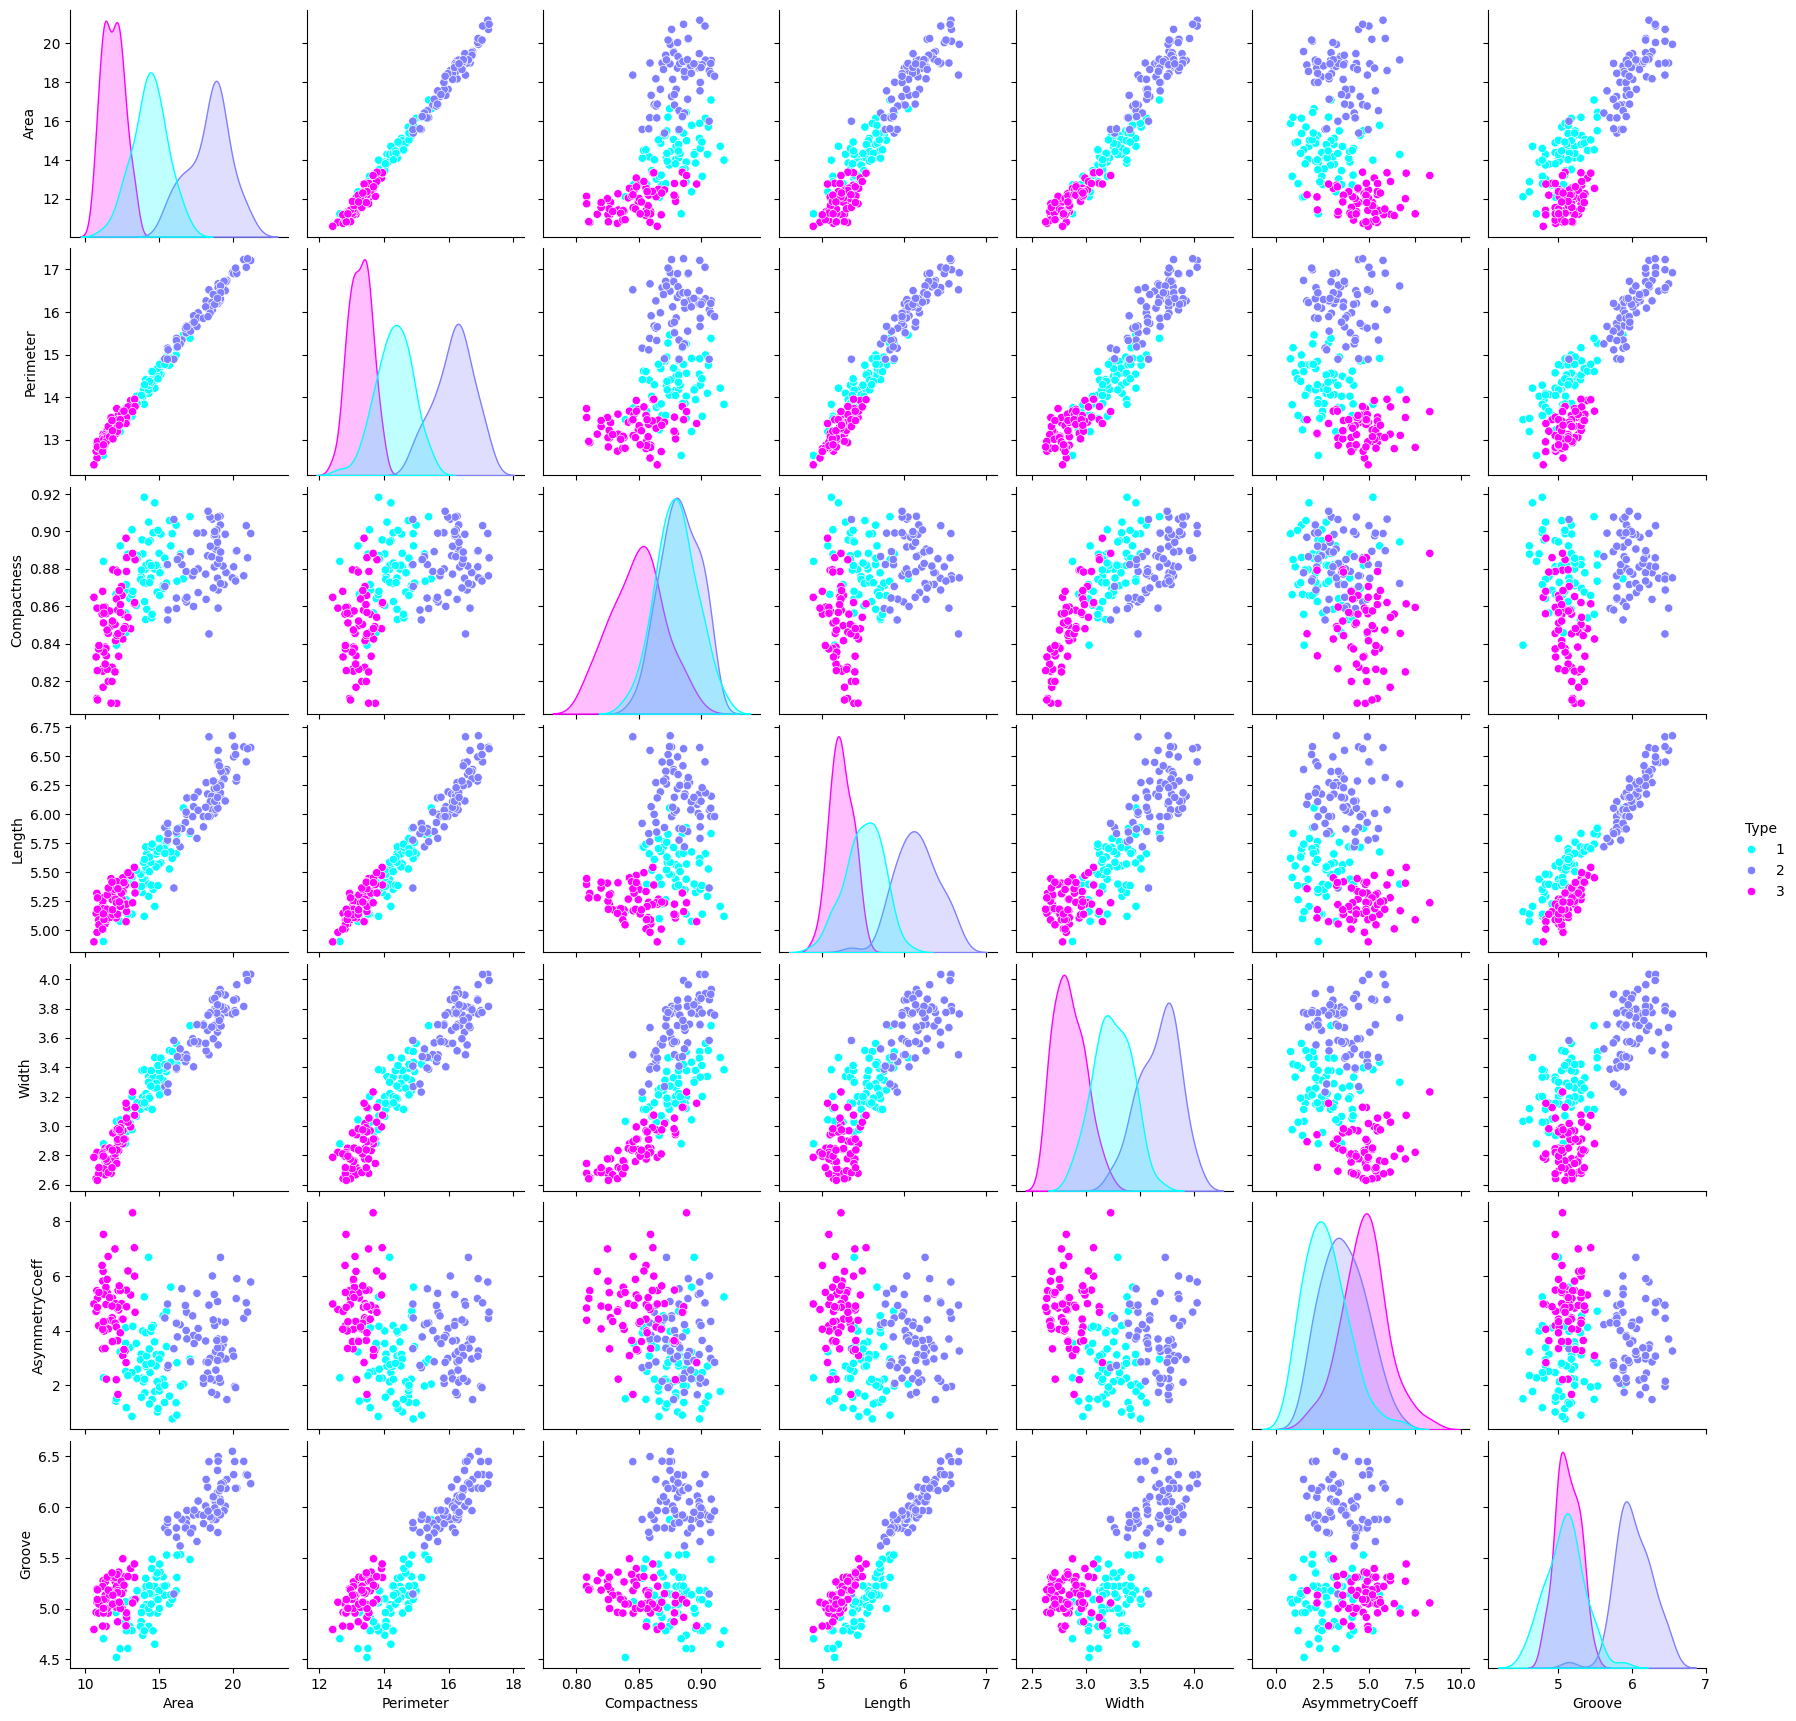

In [15]:
# Create visualisation to show relationship between features
sns.pairplot(df_wheat, hue="Type", palette="cool", diag_kind="kde")
plt.show()

The scatterplot allows us to see the relationship between our features clearly. From the scatterplot, we can see that there are some linear relationships between the features. For example, Area and Perimeter displays positive linear relationship.

### Task 2

### Model Set Up

In [16]:
# Import necessary libraries
import pycaret
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
from pycaret.classification import *

In [17]:
clf = setup(
    data = df_wheat,
    target = 'Type',
    session_id = 123,
    normalize = True,
    polynomial_features = True,
    remove_outliers = True, 
    log_experiment=True, 
    experiment_name='wheat_seeds_experiment')

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(192, 36)"
6,Transformed train set shape,"(132, 36)"
7,Transformed test set shape,"(60, 36)"
8,Numeric features,7
9,Preprocess,True


2025/02/28 03:23:25 INFO mlflow.tracking.fluent: Experiment with name 'wheat_seeds_experiment' does not exist. Creating a new experiment.


For preprocessing, I have used normalize, polynomial_features and remove_outliers. As the wheat types are already categorised as 1 (Kama), 2 (Rosa), 3 (Canadian), I did not use one hot encoding since pycaret would help us to do the mapping automatically. This can be seen above under the 'Target Mapping' row. Since our target column is the wheat types which does not follow any intrinsic order, ordinal encoding has not been applied. In addition, as aforementioned, our dataset seems to be very well balanced so I did not use fix_imbalance. However, as we know that there are multiple outliers in the different columns, remove_outliers has been used to remove them so that it helps with our model performance. 

For feature engineering, only polynomial_features has been used as it helps to capture relationships between dependent and independent variables that can be more complex. I did not apply any binning or grouping of features since I did not find any features that were closely related to one another. Moreover, like I have mentioned in the beginning, the dataset is small and the ranges of values in the numeric features are very small as well. Therefore, I did not perform any binning for our continuous data. 

Lastly, I chose to normalize the dataset since the goal of normalization is to rescale the values of numeric columns in the dataset without distorting differences in the ranges of values or losing information. Furthermore, since our dataset is skewed, it should also help with it. Overall, these preprocessing methods should prove to be useful in helping us to achieve a high accuracy model that we can use.

### Compare Model

In [18]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9714,0.0000,0.9714,0.9769,0.9714,0.9572,0.9599,0.0580
gbc,Gradient Boosting Classifier,0.9500,0.0000,0.9500,0.9617,0.9486,0.9254,0.9317,0.2320
lightgbm,Light Gradient Boosting Machine,0.9500,0.9953,0.9500,0.9636,0.9502,0.9254,0.9318,0.1380
xgboost,Extreme Gradient Boosting,0.9495,0.9914,0.9495,0.9591,0.9482,0.9242,0.9296,0.1050
svm,SVM - Linear Kernel,0.9423,0.0000,0.9423,0.9585,0.9420,0.9142,0.9220,0.0660
rf,Random Forest Classifier,0.9423,0.9946,0.9423,0.9505,0.9410,0.9133,0.9180,0.1190
lda,Linear Discriminant Analysis,0.9423,0.0000,0.9423,0.9529,0.9409,0.9134,0.9195,0.0620
dt,Decision Tree Classifier,0.9352,0.9526,0.9352,0.9493,0.9325,0.9030,0.9113,0.0680
lr,Logistic Regression,0.9346,0.0000,0.9346,0.9465,0.9331,0.9024,0.9088,0.6350
et,Extra Trees Classifier,0.9280,0.9970,0.9280,0.9440,0.9266,0.8926,0.9010,0.1050


Looking at the results above, we can see that **Ridge Classifier** achieved the highest accuracy, recall, precision, f1 and kappa score compared to other models. For AUC, it is display as 0.0000 as it does not support 'predict_proba'. Based on the results, we can see that Ridge Classifier displayed extremely strong overall model performance since the accuracy is seen to be the highest at 0.9714. This means that 97.14% of predictions were correct. Similarly, the model also had the same recall score as it's accuracy, which is 0.9714. This means that the model correctly identified 97.14% of actual positive cases. With such high recall, it also means that there are very few false negatives. For it's precision, it has a score of 0.9769. This means that the model predicted 97.69% of its positive predictions correctly, indicating that there are very few false positives. Similar to the accuracy and recall score, the model also achieved a score of 0.9714 for it's F1 score. This shows that the balance between precision and recall is high, making this model very well rounded. For the Cohen's Kappa score of 0.9572, the model shows near-perfect agreement between predicted and actual labels. Lastly, the Matthews Correlation Coefficient (MCC) of 0.9599 is a great indicator of performance, especially for imbalanced datasets. This suggests there are very strong correlation between predictions and actual values.

As for the second and third best models, we can see that they are Gradient Boosting Classifier and Light Gradient Boosting Machine. Looking at the results, both of them displayed very similar performance. But compared to Ridge Classifier, they are still not as good.

### Model Training

In [19]:
# Train Ridge Classifier and return train score along with CV
rc = create_model('ridge', return_train_score=True)

Since we know Ridge Classifier performs the best, we can train and tune it to see if we can further improve it's performance!

Based on the results above, the model is seen to be performing well even before tuning. The small drop from CV-Train accuracy (0.9800) to CV-Val accuracy (0.9714) suggests that there is also minimal overfitting! 

### Model Tuning

In [20]:
# Define custom grid for tuning
custom_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['auto', 'saga', 'sag', 'lbfgs', 'svd'],
    'fit_intercept': [True, False]
}

# Tune the model using custom grid
tuned_ridge = tune_model(rc, custom_grid=custom_grid, optimize='F1', return_train_score=True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
tuned_ridge

RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='sag',
                tol=0.0001)

For tuning, I have chosen 3 hyperparameters to tune. Firstly, I have chosen to tune the **alpha** parameter as the degree of regularization is set by this parameter. To do so, I have added in some lower and higher values for the alpha parameter. Secondly, I have chosen to tune the **solver** parameter that is used in the computational routines. To do so, I have chosen to add a few different kinds of solver to see which one would help with model performance. Thirdly, I have chosen to tune the **fit_intercept** parameter that controls whether or not the model includes an intercept (bias term) in the decision function. Lastly, I chose to optimise the F1 score as it provides a balance between precision and recall.

Based on the results after tuning, we can see that there are improvements made to the model. For example, in CV-Train, the Accuracy, Recall and F1 score improved from 0.9800 to 0.9832. For Precision, it also improved from 0.9801 to 0.9833. As for Kappa and MCC, it improved from 0.9700 and 0.9701 to 0.9748 and 0.9749 respectively. 

Looking at the CV-Val results, we can see that the model Accuracy, Recall and F1 score improved from 0.9714 to 0.9786. Furthermore, the Precision also improved from 0.9769 to 0.9829. Lastly, the Kappa and MCC improved from 0.9572 and 0.9599 to 0.9679 and 0.9700 respectively. In addition, we can also see that the standard deviation in CV-Val also decreased as compared to before.

Overall, the model is seen to perform better and this also shows that the model is able to generalise well.

### Model Evaluation

In [22]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

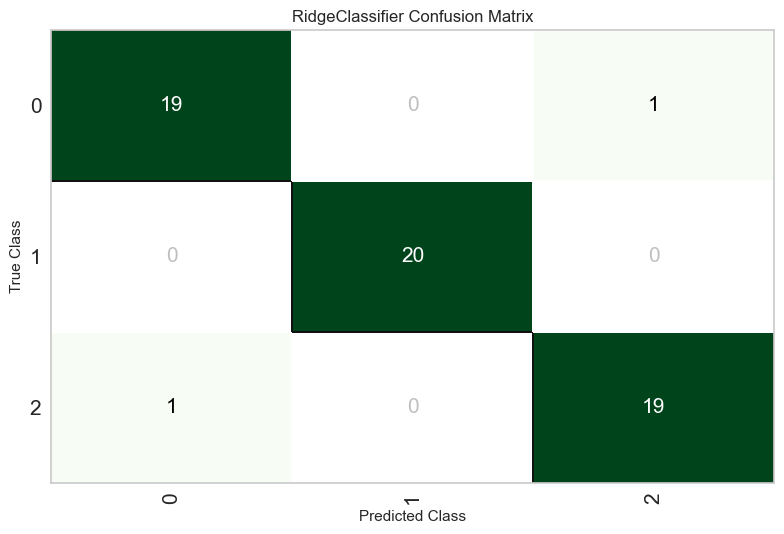

In [23]:
# Plot confusion matrix
plot_model(tuned_ridge, plot = 'confusion_matrix')

Based on the confusion matrix, we can see that for Class 0 (Kama) predictions, 19 of them were correctly classified as true positives while 1 of them was misclassified as Class 2 (Canadian). Secondly, for Class 1 (Rosa) predictions, all 20 of them were correctly classified as true positives. Lastly, for Class 2 (Canadian) predictions, 19 of them were correctly classified as true positives while 1 of them was misclassified as Class 0 (Kama).

Overall, we can see that the model performed very well based on this confusion matrix.

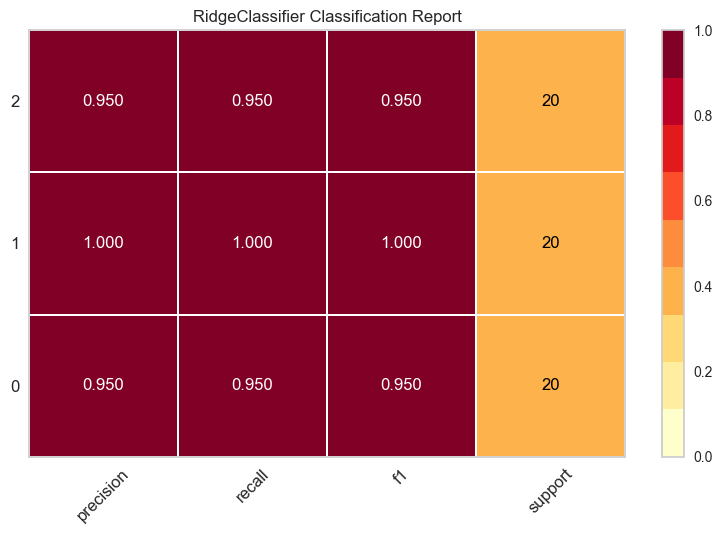

In [24]:
# Plot classification report
plot_model(tuned_ridge, plot = 'class_report')

Looking at the classification report, we can see that both Class 0 (Kama) and Class 2 (Canadian) have exactly the same precision, recall and f1 score of 0.950. As for Class 1 (Rosa) we can see that it is the only class with the perfect score of 1.000 for its precision, recall and f1 score. Overall, we can see that the model is able classify Class 1 the most accurately, with some very minor misclassification for Class 0 and Class 2.

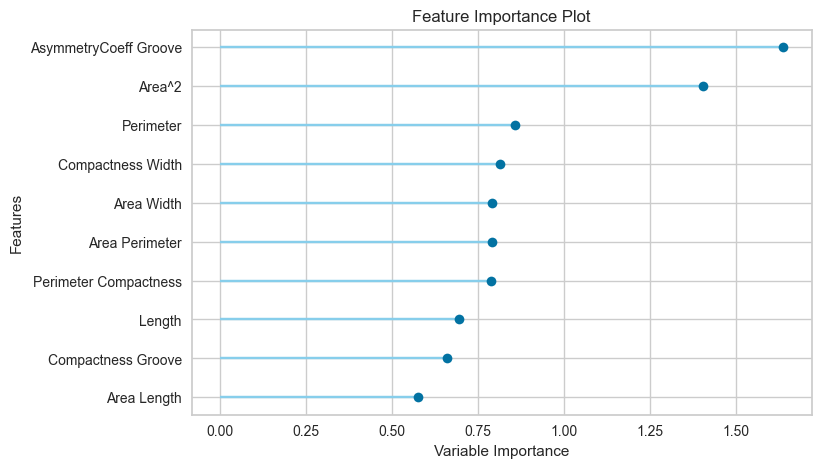

In [25]:
# Plot feature importance
plot_model(tuned_ridge, plot = 'feature')

Based on the feature importance plot, we can see that the top 3 most important features that had the greatest impact on the model's predictions are AsymmetryCoeff Groove (1.6), Area^2 (1.4), and Perimeter (0.85). This suggests that asymmetry and area related features, particularly when squared, are the strongest predictors in this model. For features that are not as important, we have Compactness Groove (0.70) and Area Length (0.60)

### Finalize Model

In [26]:
# Finalize the model
final_best = finalize_model(tuned_ridge)

In [27]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Area', 'Perimeter', 'Compactness',
                                             'Length', 'Width',
                                             'AsymmetryCoeff', 'Groove'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_va...
                                                               n_jobs=1,
                                                               random_state=123,
                                                               threshold=0.05))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('actual_estimator',
                 RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=123, solver='sag',
                                 tol=0.0001))],
         verbose=False)

### Model Prediction

In [28]:
# Predict on test set
holdout_pred = predict_model(final_best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9833,0,0.9833,0.9841,0.9833,0.9750,0.9754


Here, we can see that the accuracy of our model that is used to predict our test set is 98.33% which shows that the model is performing extremely well! Similarly, other performance metrics can be seen doing well too!

In [29]:
# Show predictions df
holdout_pred.head()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type,prediction_label
84,21.180000,17.209999,0.8989,6.573,4.033,5.780,6.231,2,2
9,15.260000,14.850000,0.8696,5.714,3.242,4.543,5.314,1,1
69,19.110001,16.260000,0.9081,6.154,3.930,2.936,6.079,2,2
141,12.490000,13.460000,0.8658,5.267,2.967,4.421,5.002,3,3
114,20.030001,16.900000,0.8811,6.493,3.857,3.063,6.320,2,2


Based on the prediction of the first 5 rows, we can see that the model managed to predict everything correctly.

In [30]:
# Copy data and drop class variable
new_data = df_wheat.copy()
new_data.drop('Type', axis=1, inplace=True)
new_data.head()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [31]:
# Predict model on new_data
predictions = predict_model(final_best, data = new_data)
predictions.head()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,prediction_label
0,15.260000,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.880000,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.290000,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.840000,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.139999,14.99,0.9034,5.658,3.562,1.355,5.175,1


Here, we can see that the model managed to provide accurate predictions too.

### Save Model & Experiment

In [32]:
# Save Model
save_model(final_best, 'wheat-seeds-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'Perimeter', 'Compactness',
                                              'Length', 'Width',
                                              'AsymmetryCoeff', 'Groove'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_va...
                                                                n_jobs=1,
                                                                random_state=123,
                                                                thresh

In [33]:
# Save experiment
save_experiment('wheat_seeds_experiment')

### Register Model With MLFlow

In [34]:
# Log the best model
mlflow.sklearn.log_model(sk_model=final_best,
                         artifact_path="wheat_seed_classification_model")

In [35]:
# Register the model in MLflow Model Registry
mlflow.register_model(
    "runs:/{}/wheat_seed_classification_model".format(mlflow.active_run().info.run_id), 
    "Wheat_Seed_Classification"
)

Successfully registered model 'Wheat_Seed_Classification'.
2025/02/28 03:25:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Wheat_Seed_Classification, version 1
Created version '1' of model 'Wheat_Seed_Classification'.


<ModelVersion: aliases=[], creation_timestamp=1740684343175, current_stage='None', description='', last_updated_timestamp=1740684343175, name='Wheat_Seed_Classification', run_id='d04338ce846843878bfd58b2e48f152d', run_link='', source='mlflow-artifacts:/163621371797828728/d04338ce846843878bfd58b2e48f152d/artifacts/wheat_seed_classification_model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [36]:
from mlflow.sklearn import load_model

# Load model from MLFlow registry
wheat_seed_model = load_model("models:/Wheat_Seed_Classification/latest")

# Make predictions on new data
predictions = wheat_seed_model.predict(new_data)

In [37]:
# Show predictions made
predictions

0      1
1      1
2      1
3      1
4      1
      ..
194    3
195    3
196    3
197    3
198    3
Name: Type, Length: 199, dtype: int8

From this, we can see that we have successfully registered our model with MLFlow. This can be further proven when we load the model to make predictions which the model did successfully too.